In [135]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

import env

import wrangle_zillow

df = wrangle_zillow.acquire()

pd.options.display.max_rows = 100 

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format


In [136]:
p_null = wrangle_zillow.nulls_by_columns(df)

In [138]:
def handle_missing_values(df, prop_required_column = .9):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    return df

In [139]:
df = handle_missing_values(df)

In [142]:
df = df.dropna()

In [144]:
df.drop(columns=['transactiondate', 'parcelid', 'id', 'propertylandusedesc', 'propertycountylandusecode'], inplace=True)

In [145]:
df.drop(columns=['bedroomcnt', 'calculatedbathnbr', 'fullbathcnt', 'regionidcounty', 'regionidcity', 'roomcnt', 'assessmentyear'], inplace=True)

In [151]:
df['logerror_encoded'] = pd.cut(df['logerror'], bins=[-4.66, -0.02, 0.04, 5.26], 
                      labels=[0, 1, 0], ordered=False)

In [117]:
df['yearbuilt_encoded'] = pd.cut(df['yearbuilt'], bins=[1878, 1960, 2016], labels=[0, 1])

In [119]:
df['bathroomcnt'] = df['bathroomcnt'].map(lambda x: x if x < 5 else 5)

In [120]:
df.drop(df[df['bathroomcnt'] == 0].index, inplace = True)

In [124]:
df.drop(df[df['finishedsquarefeet12'] > 15000].index, inplace = True)
df.drop(df[df['regionidzip'] > 150000].index, inplace = True)
df.drop(df[df['taxvaluedollarcnt'] > 5000000].index, inplace = True)
df.drop(df[df['landtaxvaluedollarcnt'] > 5000000].index, inplace = True)
df.drop(df[df['taxamount'] > 20000].index, inplace = True)

In [156]:
def split_zillow_data(df):
    '''
    This function performs split on zillow data
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)
    return train, validate, test


In [157]:
train, validate, test = split_zillow_data(df)

In [26]:
X_train = train.drop(columns=['logerror_encoded'])
y_train = train.logerror_encoded

In [27]:
clf = DecisionTreeClassifier(max_depth=6, random_state=123)

In [28]:
clf = clf.fit(X_train, y_train)

In [29]:
y_pred_proba = clf.predict_proba(X_train)

In [30]:
X_train.columns[clf.feature_importances_.argsort()[::-1]]

Index(['yearbuilt', 'calculatedfinishedsquarefeet', 'regionidzip',
       'taxvaluedollarcnt', 'longitude', 'latitude', 'rawcensustractandblock',
       'landtaxvaluedollarcnt', 'taxamount', 'structuretaxvaluedollarcnt',
       'finishedsquarefeet12', 'censustractandblock', 'bathroomcnt',
       'yearbuilt_encoded', 'propertylandusetypeid', 'fips'],
      dtype='object')

### Key Features: 
- yearbuilt 
- regionidzip
- calculatedfinishedsquarefeet 
- finishedsquarefeet12 
- taxamount 
- taxvaluedollarcnt 
- rawcensustractandblock
- landtaxvaluedollarcnt 
- longitude
- structuretaxvaluedollarcnt 
- latitude

<function matplotlib.pyplot.show(close=None, block=None)>

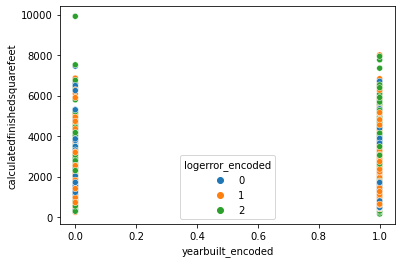

In [96]:
sns.scatterplot(x = 'yearbuilt_encoded', y='calculatedfinishedsquarefeet', data=train, hue='logerror_encoded')
plt.show

In [158]:
train.logerror_encoded.value_counts()

0    20688
1    19583
Name: logerror_encoded, dtype: int64

<Figure size 936x504 with 0 Axes>

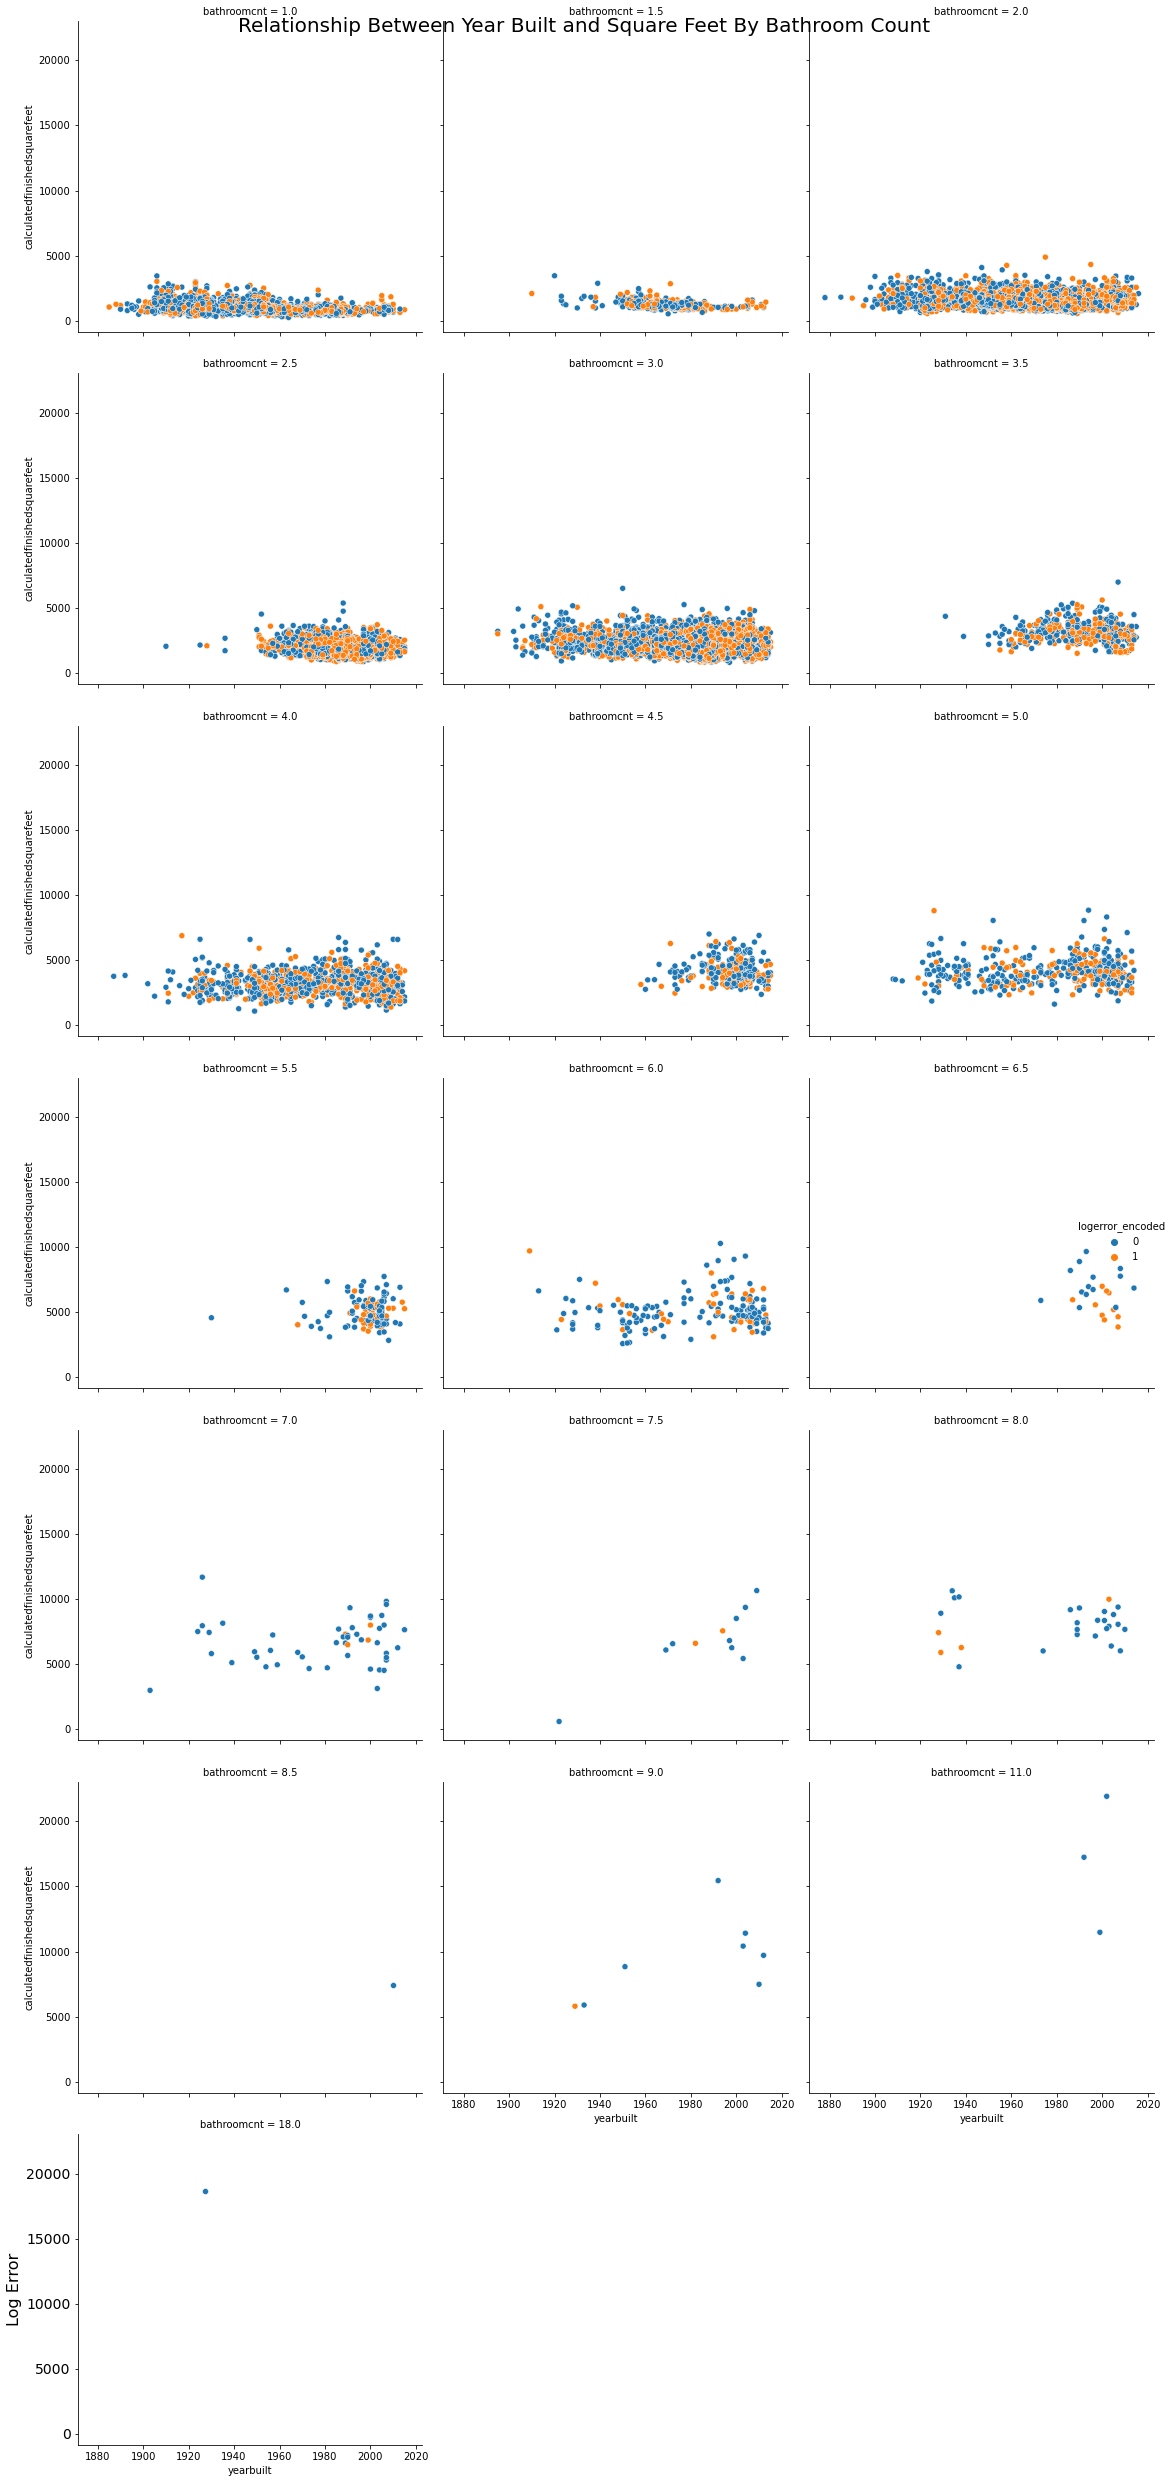

In [159]:
x = train.yearbuilt
y = train.calculatedfinishedsquarefeet
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.relplot(data=train, x= x, y= y, hue="logerror_encoded", col="bathroomcnt", col_wrap=3)
# fit labels and legend
plt.suptitle('Relationship Between Year Built and Square Feet By Bathroom Count', fontsize = 20)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

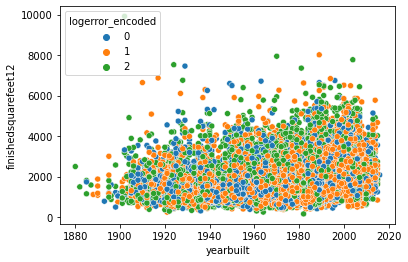

In [31]:
sns.scatterplot(x = 'yearbuilt', y='finishedsquarefeet12', data=train, hue='logerror_encoded')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

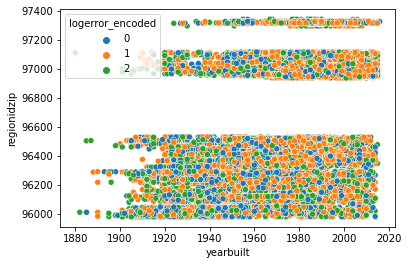

In [32]:
sns.scatterplot(x = 'yearbuilt', y='regionidzip', data=train, hue='logerror_encoded')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

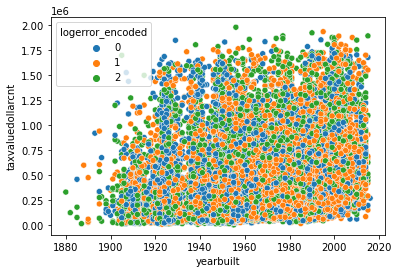

In [33]:
sns.scatterplot(x = 'yearbuilt', y='taxvaluedollarcnt', data=train, hue='logerror_encoded')
plt.show

### Homes built after 1960 have lower log errors than homes built before 1960

<function matplotlib.pyplot.show(close=None, block=None)>

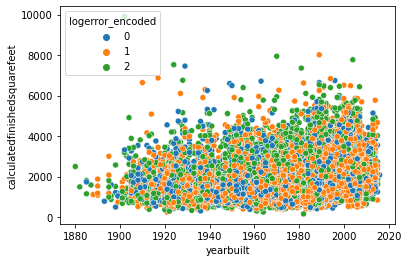

In [34]:
sns.scatterplot(x = 'yearbuilt', y='calculatedfinishedsquarefeet', data=train, hue='logerror_encoded')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

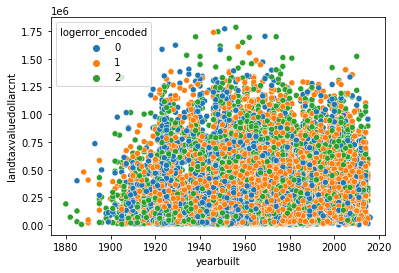

In [35]:
sns.scatterplot(x = 'yearbuilt', y='landtaxvaluedollarcnt', data=train, hue='logerror_encoded')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

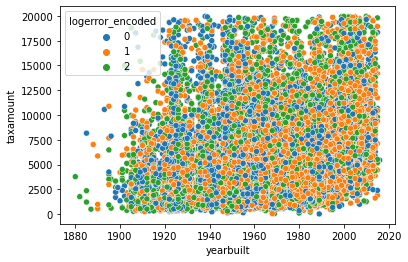

In [36]:
sns.scatterplot(x = 'yearbuilt', y='taxamount', data=train, hue='logerror_encoded')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

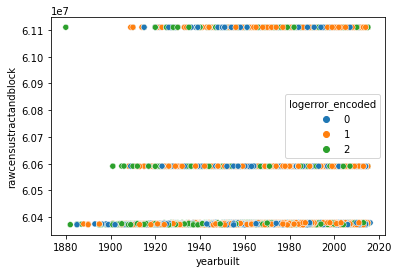

In [37]:
sns.scatterplot(x = 'yearbuilt', y='rawcensustractandblock', data=train, hue='logerror_encoded')
plt.show

### regionidzip

<function matplotlib.pyplot.show(close=None, block=None)>

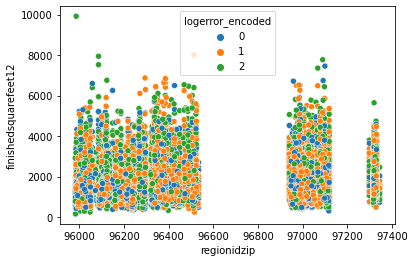

In [38]:
sns.scatterplot(x = 'regionidzip', y='finishedsquarefeet12', data=train, hue='logerror_encoded')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

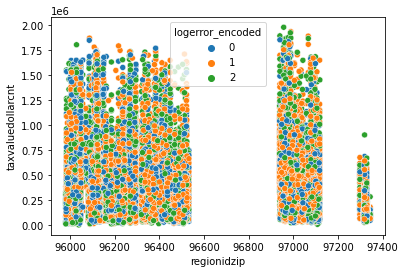

In [39]:
sns.scatterplot(x = 'regionidzip', y='taxvaluedollarcnt', data=train, hue='logerror_encoded')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

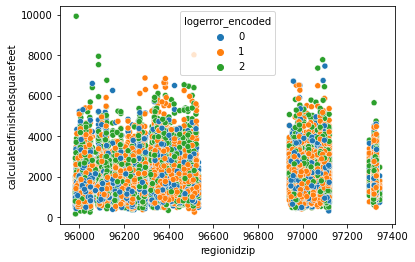

In [40]:
sns.scatterplot(x = 'regionidzip', y='calculatedfinishedsquarefeet', data=train, hue='logerror_encoded')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

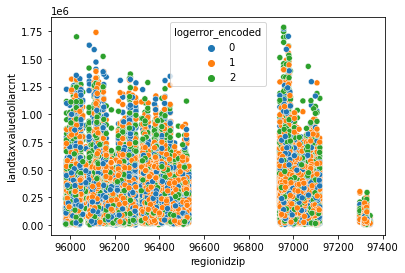

In [41]:
sns.scatterplot(x = 'regionidzip', y='landtaxvaluedollarcnt', data=train, hue='logerror_encoded')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

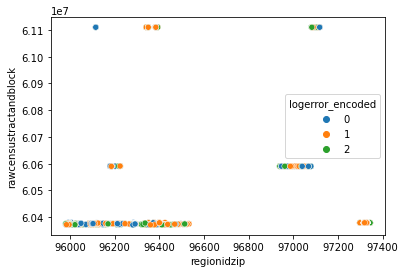

In [42]:
sns.scatterplot(x = 'regionidzip', y='rawcensustractandblock', data=train, hue='logerror_encoded')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

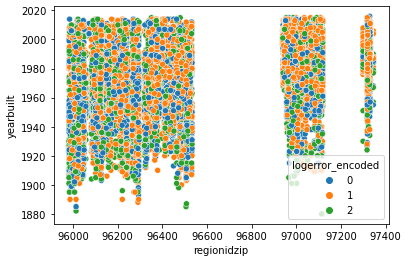

In [43]:
sns.scatterplot(x = 'regionidzip', y='yearbuilt', data=train, hue='logerror_encoded')
plt.show

### Calculated finished square feet 

<function matplotlib.pyplot.show(close=None, block=None)>

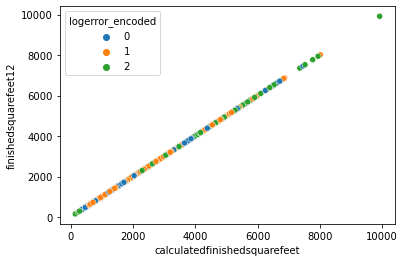

In [44]:
sns.scatterplot(x = 'calculatedfinishedsquarefeet', y='finishedsquarefeet12', data=train, hue='logerror_encoded')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

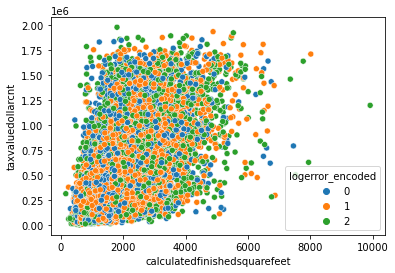

In [45]:
sns.scatterplot(x = 'calculatedfinishedsquarefeet', y='taxvaluedollarcnt', data=train, hue='logerror_encoded')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

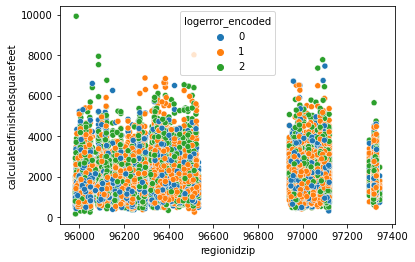

In [46]:
sns.scatterplot(x = 'regionidzip', y='calculatedfinishedsquarefeet', data=train, hue='logerror_encoded')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

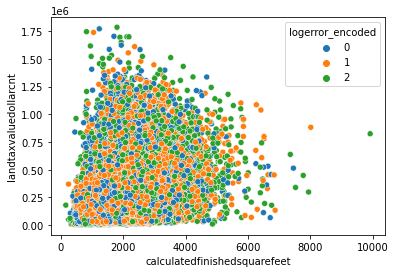

In [47]:
sns.scatterplot(x = 'calculatedfinishedsquarefeet', y='landtaxvaluedollarcnt', data=train, hue='logerror_encoded')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

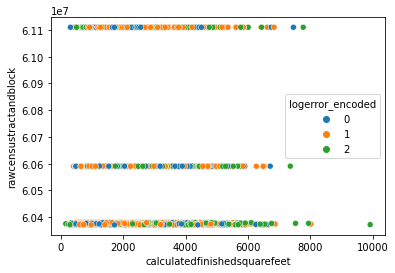

In [48]:
sns.scatterplot(x = 'calculatedfinishedsquarefeet', y='rawcensustractandblock', data=train, hue='logerror_encoded')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

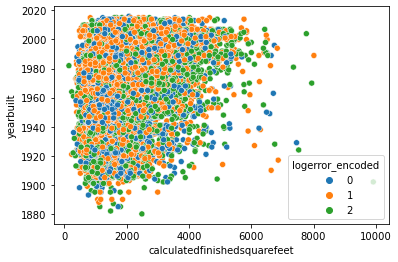

In [49]:
sns.scatterplot(x = 'calculatedfinishedsquarefeet', y='yearbuilt', data=train, hue='logerror_encoded')
plt.show

# Clustering 

In [50]:
from sklearn.cluster import KMeans

In [51]:
train.head()

,bathroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,propertylandusetypeid,rawcensustractandblock,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror_encoded,yearbuilt_encoded
57409,2.50,"1,853.00","1,853.00","6,111.00","34,159,417.00","-119,224,438.00",261.00,"61,110,036.12","97,106.00","1,978.00","336,433.00","647,635.00","311,202.00","7,354.62","61,110,036,122,010.00",2,1
46624,5.00,"3,760.00","3,760.00","6,111.00","34,449,407.00","-119,254,052.00",261.00,"61,110,009.01","97,099.00","1,982.00","501,928.00","872,850.00","370,922.00","9,673.46","61,110,009,011,034.00",1,1
66098,5.00,"4,050.00","4,050.00","6,037.00","34,159,949.00","-118,494,456.00",261.00,"60,371,397.01","96,426.00","2,006.00","556,648.00","1,382,623.00","825,975.00","16,750.70","60,371,397,012,006.00",2,1
24242,1.50,988.00,988.00,"6,059.00","33,792,796.00","-117,909,573.00",261.00,"60,590,884.03","97,021.00","1,957.00","25,235.00","47,261.00","22,026.00",873.28,"60,590,884,031,010.00",1,0
50974,2.00,"1,875.00","1,875.00","6,037.00","33,958,136.00","-118,006,970.00",261.00,"60,375,002.02","96,173.00","1,948.00","263,853.00","755,938.00","492,085.00","8,891.61","60,375,002,024,006.00",2,0


In [52]:
#scale data 
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['yearbuilt', 'calculatedfinishedsquarefeet', 'regionidzip'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [53]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test)

In [54]:
X = train_scaled[['yearbuilt', 'calculatedfinishedsquarefeet']]

In [55]:
X

,yearbuilt,calculatedfinishedsquarefeet
57409,0.72,0.17
46624,0.75,0.37
66098,0.93,0.40
24242,0.57,0.09
50974,0.50,0.18
...,...,...
48514,0.51,0.22
1335,0.90,0.27
77094,0.32,0.06
20623,0.28,0.13


In [56]:
kmeans = KMeans(n_clusters=5)

In [57]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [58]:
new_data = kmeans.predict(X)

In [59]:
unknown_value = train_scaled.copy()
unknown_value['cluster'] = new_data
unknown_value


,bathroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,propertylandusetypeid,rawcensustractandblock,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror_encoded,yearbuilt_encoded,cluster
57409,2.50,0.17,"1,853.00","6,111.00","34,159,417.00","-119,224,438.00",261.00,"61,110,036.12",0.83,0.72,"336,433.00","647,635.00","311,202.00","7,354.62","61,110,036,122,010.00",2,1,0
46624,5.00,0.37,"3,760.00","6,111.00","34,449,407.00","-119,254,052.00",261.00,"61,110,009.01",0.82,0.75,"501,928.00","872,850.00","370,922.00","9,673.46","61,110,009,011,034.00",1,1,4
66098,5.00,0.40,"4,050.00","6,037.00","34,159,949.00","-118,494,456.00",261.00,"60,371,397.01",0.33,0.93,"556,648.00","1,382,623.00","825,975.00","16,750.70","60,371,397,012,006.00",2,1,4
24242,1.50,0.09,988.00,"6,059.00","33,792,796.00","-117,909,573.00",261.00,"60,590,884.03",0.76,0.57,"25,235.00","47,261.00","22,026.00",873.28,"60,590,884,031,010.00",1,0,3
50974,2.00,0.18,"1,875.00","6,037.00","33,958,136.00","-118,006,970.00",261.00,"60,375,002.02",0.14,0.50,"263,853.00","755,938.00","492,085.00","8,891.61","60,375,002,024,006.00",2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48514,2.00,0.22,"2,296.00","6,037.00","34,116,039.00","-118,087,253.00",261.00,"60,374,800.02",0.39,0.51,"118,871.00","149,700.00","30,829.00","2,114.16","60,374,800,023,005.00",2,0,3
1335,3.00,0.27,"2,743.00","6,037.00","34,684,439.00","-118,167,583.00",261.00,"60,379,010.09",0.98,0.90,"221,912.00","277,389.00","55,477.00","4,166.76","60,379,010,092,007.00",1,1,2
77094,1.00,0.06,720.00,"6,037.00","34,027,099.00","-118,355,787.00",261.00,"60,372,198.00",0.01,0.32,"74,697.00","238,731.00","164,034.00","2,968.60","60,372,198,001,003.00",1,0,1
20623,1.00,0.13,"1,405.00","6,037.00","34,081,527.00","-118,318,073.00",261.00,"60,371,924.10",0.00,0.28,"184,120.00","920,606.00","736,486.00","11,194.08","60,371,924,103,002.00",1,0,1


In [60]:
unknown_value[['logerror_encoded', 'cluster']]

,logerror_encoded,cluster
57409,2,0
46624,1,4
66098,2,4
24242,1,3
50974,2,3
...,...,...
48514,2,3
1335,1,2
77094,1,1
20623,1,1


In [61]:
unknown_value.shape

(39130, 18)

In [62]:
unknown_value[unknown_value.logerror_encoded == unknown_value.cluster]

,bathroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,propertylandusetypeid,rawcensustractandblock,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror_encoded,yearbuilt_encoded,cluster
41383,1.00,0.10,"1,094.00","6,037.00","34,181,603.00","-118,350,822.00",261.00,"60,373,111.00",0.33,0.43,"129,012.00","198,474.00","69,462.00","2,193.99","60,373,111,002,014.00",1,0,1
71694,2.00,0.10,"1,130.00","6,059.00","33,487,900.00","-117,713,000.00",266.00,"60,590,423.23",0.72,0.79,"139,144.00","271,356.00","132,212.00","3,127.84","60,590,423,232,009.00",0,1,0
70313,3.00,0.24,"2,483.00","6,037.00","34,035,800.00","-118,487,000.00",266.00,"60,377,012.02",0.12,0.66,"264,856.00","761,470.00","496,614.00","9,145.81","60,377,012,021,013.00",0,1,0
20301,2.00,0.08,904.00,"6,059.00","33,926,700.00","-117,948,000.00",266.00,"60,590,013.04",0.15,0.76,"71,084.00","129,445.00","58,361.00","1,749.78","60,590,013,042,022.00",0,1,0
5034,1.00,0.05,648.00,"6,037.00","34,101,095.00","-117,764,822.00",261.00,"60,374,016.02",0.38,0.43,"60,700.00","300,000.00","239,300.00","3,620.75","60,374,016,022,030.00",1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27144,2.50,0.15,"1,645.00","6,111.00","34,179,471.00","-118,792,002.00",266.00,"61,110,074.02",0.30,0.79,"281,386.00","562,772.00","281,386.00","6,628.24","61,110,074,023,001.00",0,1,0
75468,1.00,0.31,"3,196.00","6,037.00","33,992,550.00","-118,334,974.00",261.00,"60,372,346.00",0.03,0.24,"223,355.00","527,930.00","304,575.00","6,488.09","60,372,346,004,023.00",1,0,1
64780,4.00,0.26,"2,667.00","6,037.00","34,107,081.00","-118,178,898.00",261.00,"60,371,837.02",0.03,0.91,"416,094.00","550,491.00","134,397.00","6,772.16","60,371,837,021,011.00",2,1,2
77094,1.00,0.06,720.00,"6,037.00","34,027,099.00","-118,355,787.00",261.00,"60,372,198.00",0.01,0.32,"74,697.00","238,731.00","164,034.00","2,968.60","60,372,198,001,003.00",1,0,1


In [63]:
8574/39131

0.21911016840867853

<function matplotlib.pyplot.show(close=None, block=None)>

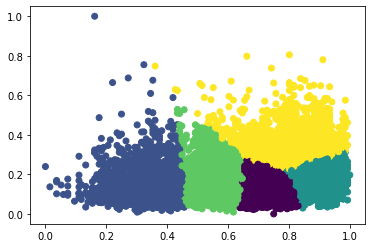

In [64]:
plt.scatter(train_scaled['yearbuilt'],train_scaled['calculatedfinishedsquarefeet'], c= unknown_value['cluster'])
plt.show

In [65]:
kmeans.inertia_

246.02306540448674

In [66]:
wcss=[]

for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [67]:
wcss

[1331.1393585691765,
 592.6360736903076,
 421.33514193101803,
 304.4815480171917,
 246.00886307974295,
 202.160912207004]

Text(0, 0.5, 'Within-cluster Sum of Squares')

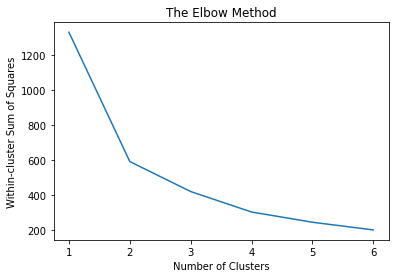

In [68]:
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

In [69]:
#appears 2 or 3 would be best, I will start with two 

In [70]:
kmeans = KMeans(n_clusters=2)

In [71]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [72]:
new_data = kmeans.predict(X)

In [73]:
unknown_value = train_scaled.copy()
unknown_value['cluster'] = new_data
unknown_value

,bathroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,propertylandusetypeid,rawcensustractandblock,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror_encoded,yearbuilt_encoded,cluster
57409,2.50,0.17,"1,853.00","6,111.00","34,159,417.00","-119,224,438.00",261.00,"61,110,036.12",0.83,0.72,"336,433.00","647,635.00","311,202.00","7,354.62","61,110,036,122,010.00",2,1,0
46624,5.00,0.37,"3,760.00","6,111.00","34,449,407.00","-119,254,052.00",261.00,"61,110,009.01",0.82,0.75,"501,928.00","872,850.00","370,922.00","9,673.46","61,110,009,011,034.00",1,1,0
66098,5.00,0.40,"4,050.00","6,037.00","34,159,949.00","-118,494,456.00",261.00,"60,371,397.01",0.33,0.93,"556,648.00","1,382,623.00","825,975.00","16,750.70","60,371,397,012,006.00",2,1,0
24242,1.50,0.09,988.00,"6,059.00","33,792,796.00","-117,909,573.00",261.00,"60,590,884.03",0.76,0.57,"25,235.00","47,261.00","22,026.00",873.28,"60,590,884,031,010.00",1,0,1
50974,2.00,0.18,"1,875.00","6,037.00","33,958,136.00","-118,006,970.00",261.00,"60,375,002.02",0.14,0.50,"263,853.00","755,938.00","492,085.00","8,891.61","60,375,002,024,006.00",2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48514,2.00,0.22,"2,296.00","6,037.00","34,116,039.00","-118,087,253.00",261.00,"60,374,800.02",0.39,0.51,"118,871.00","149,700.00","30,829.00","2,114.16","60,374,800,023,005.00",2,0,1
1335,3.00,0.27,"2,743.00","6,037.00","34,684,439.00","-118,167,583.00",261.00,"60,379,010.09",0.98,0.90,"221,912.00","277,389.00","55,477.00","4,166.76","60,379,010,092,007.00",1,1,0
77094,1.00,0.06,720.00,"6,037.00","34,027,099.00","-118,355,787.00",261.00,"60,372,198.00",0.01,0.32,"74,697.00","238,731.00","164,034.00","2,968.60","60,372,198,001,003.00",1,0,1
20623,1.00,0.13,"1,405.00","6,037.00","34,081,527.00","-118,318,073.00",261.00,"60,371,924.10",0.00,0.28,"184,120.00","920,606.00","736,486.00","11,194.08","60,371,924,103,002.00",1,0,1


In [74]:
unknown_value[['logerror_encoded', 'cluster']]

,logerror_encoded,cluster
57409,2,0
46624,1,0
66098,2,0
24242,1,1
50974,2,1
...,...,...
48514,2,1
1335,1,0
77094,1,1
20623,1,1


In [75]:
unknown_value.shape

(39130, 18)

In [76]:
unknown_value[unknown_value.logerror_encoded == unknown_value.cluster]

,bathroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,propertylandusetypeid,rawcensustractandblock,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror_encoded,yearbuilt_encoded,cluster
24242,1.50,0.09,988.00,"6,059.00","33,792,796.00","-117,909,573.00",261.00,"60,590,884.03",0.76,0.57,"25,235.00","47,261.00","22,026.00",873.28,"60,590,884,031,010.00",1,0,1
39714,2.50,0.17,"1,801.00","6,059.00","33,554,012.00","-117,638,146.00",266.00,"60,590,320.59",0.75,0.90,"287,943.00","522,000.00","234,057.00","8,243.40","60,590,320,595,000.00",0,1,0
41383,1.00,0.10,"1,094.00","6,037.00","34,181,603.00","-118,350,822.00",261.00,"60,373,111.00",0.33,0.43,"129,012.00","198,474.00","69,462.00","2,193.99","60,373,111,002,014.00",1,0,1
63695,2.00,0.17,"1,772.00","6,037.00","34,180,070.00","-118,407,392.00",261.00,"60,371,237.00",0.34,0.57,"181,218.00","636,853.00","455,635.00","7,660.22","60,371,237,003,006.00",1,0,1
41481,1.00,0.15,"1,609.00","6,037.00","34,697,424.00","-118,121,280.00",261.00,"60,379,006.06",0.98,0.57,"50,591.00","63,237.00","12,646.00","1,552.13","60,379,006,061,009.00",1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27144,2.50,0.15,"1,645.00","6,111.00","34,179,471.00","-118,792,002.00",266.00,"61,110,074.02",0.30,0.79,"281,386.00","562,772.00","281,386.00","6,628.24","61,110,074,023,001.00",0,1,0
75468,1.00,0.31,"3,196.00","6,037.00","33,992,550.00","-118,334,974.00",261.00,"60,372,346.00",0.03,0.24,"223,355.00","527,930.00","304,575.00","6,488.09","60,372,346,004,023.00",1,0,1
43736,1.00,0.08,966.00,"6,037.00","34,248,743.00","-118,426,825.00",261.00,"60,371,190.02",0.28,0.52,"72,544.00","258,137.00","185,593.00","3,203.67","60,371,190,022,003.00",1,0,1
77094,1.00,0.06,720.00,"6,037.00","34,027,099.00","-118,355,787.00",261.00,"60,372,198.00",0.01,0.32,"74,697.00","238,731.00","164,034.00","2,968.60","60,372,198,001,003.00",1,0,1


In [77]:
12773/39131

0.3264163962076103

<function matplotlib.pyplot.show(close=None, block=None)>

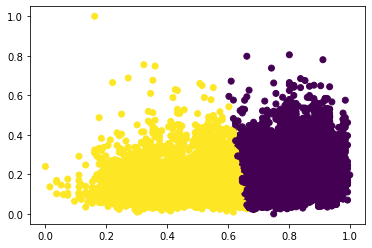

In [78]:
plt.scatter(train_scaled['yearbuilt'],train_scaled['calculatedfinishedsquarefeet'], c= unknown_value['cluster'])
plt.show

In [79]:
kmeans.inertia_

592.6361967586126

In [80]:
wcss=[]

for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [81]:
wcss

[1331.1393585691762,
 592.6359157097656,
 421.33380448353967,
 304.48025791907196,
 246.00892662869808,
 202.1600303996142]

Text(0, 0.5, 'Within-cluster Sum of Squares')

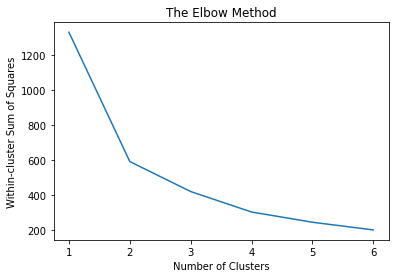

In [82]:
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')

### Region ID ZIP vs Year Built 

In [83]:
A = train_scaled[['yearbuilt', 'regionidzip']]

In [84]:
kmeans = KMeans(n_clusters=3)

In [85]:
kmeans.fit(A)

KMeans(n_clusters=3)

In [86]:
new_data = kmeans.predict(A)

In [87]:
unknown_value = train_scaled.copy()
unknown_value['cluster'] = new_data
unknown_value

,bathroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,propertylandusetypeid,rawcensustractandblock,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror_encoded,yearbuilt_encoded,cluster
57409,2.50,0.17,"1,853.00","6,111.00","34,159,417.00","-119,224,438.00",261.00,"61,110,036.12",0.83,0.72,"336,433.00","647,635.00","311,202.00","7,354.62","61,110,036,122,010.00",2,1,1
46624,5.00,0.37,"3,760.00","6,111.00","34,449,407.00","-119,254,052.00",261.00,"61,110,009.01",0.82,0.75,"501,928.00","872,850.00","370,922.00","9,673.46","61,110,009,011,034.00",1,1,1
66098,5.00,0.40,"4,050.00","6,037.00","34,159,949.00","-118,494,456.00",261.00,"60,371,397.01",0.33,0.93,"556,648.00","1,382,623.00","825,975.00","16,750.70","60,371,397,012,006.00",2,1,2
24242,1.50,0.09,988.00,"6,059.00","33,792,796.00","-117,909,573.00",261.00,"60,590,884.03",0.76,0.57,"25,235.00","47,261.00","22,026.00",873.28,"60,590,884,031,010.00",1,0,1
50974,2.00,0.18,"1,875.00","6,037.00","33,958,136.00","-118,006,970.00",261.00,"60,375,002.02",0.14,0.50,"263,853.00","755,938.00","492,085.00","8,891.61","60,375,002,024,006.00",2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48514,2.00,0.22,"2,296.00","6,037.00","34,116,039.00","-118,087,253.00",261.00,"60,374,800.02",0.39,0.51,"118,871.00","149,700.00","30,829.00","2,114.16","60,374,800,023,005.00",2,0,0
1335,3.00,0.27,"2,743.00","6,037.00","34,684,439.00","-118,167,583.00",261.00,"60,379,010.09",0.98,0.90,"221,912.00","277,389.00","55,477.00","4,166.76","60,379,010,092,007.00",1,1,1
77094,1.00,0.06,720.00,"6,037.00","34,027,099.00","-118,355,787.00",261.00,"60,372,198.00",0.01,0.32,"74,697.00","238,731.00","164,034.00","2,968.60","60,372,198,001,003.00",1,0,0
20623,1.00,0.13,"1,405.00","6,037.00","34,081,527.00","-118,318,073.00",261.00,"60,371,924.10",0.00,0.28,"184,120.00","920,606.00","736,486.00","11,194.08","60,371,924,103,002.00",1,0,0


In [88]:
unknown_value[['logerror_encoded', 'cluster']]

,logerror_encoded,cluster
57409,2,1
46624,1,1
66098,2,2
24242,1,1
50974,2,0
...,...,...
48514,2,0
1335,1,1
77094,1,0
20623,1,0


In [89]:
unknown_value[unknown_value.logerror_encoded == unknown_value.cluster]

,bathroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,latitude,longitude,propertylandusetypeid,rawcensustractandblock,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror_encoded,yearbuilt_encoded,cluster
46624,5.00,0.37,"3,760.00","6,111.00","34,449,407.00","-119,254,052.00",261.00,"61,110,009.01",0.82,0.75,"501,928.00","872,850.00","370,922.00","9,673.46","61,110,009,011,034.00",1,1,1
66098,5.00,0.40,"4,050.00","6,037.00","34,159,949.00","-118,494,456.00",261.00,"60,371,397.01",0.33,0.93,"556,648.00","1,382,623.00","825,975.00","16,750.70","60,371,397,012,006.00",2,1,2
24242,1.50,0.09,988.00,"6,059.00","33,792,796.00","-117,909,573.00",261.00,"60,590,884.03",0.76,0.57,"25,235.00","47,261.00","22,026.00",873.28,"60,590,884,031,010.00",1,0,1
7988,3.00,0.17,"1,831.00","6,037.00","33,857,498.00","-118,368,713.00",269.00,"60,376,505.02",0.13,0.71,"211,800.00","600,000.00","388,200.00","6,932.43","60,376,505,021,000.00",2,1,2
17229,3.50,0.39,"4,009.00","6,059.00","33,526,856.00","-117,652,686.00",261.00,"60,590,320.61",0.74,0.75,"472,600.00","1,144,928.00","672,328.00","12,013.78","60,590,320,611,045.00",1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23845,3.50,0.21,"2,233.00","6,059.00","33,636,521.00","-117,598,738.00",261.00,"60,590,320.54",0.74,0.98,"349,345.00","541,056.00","191,711.00","6,734.96","60,590,524,211,002.00",1,1,1
64780,4.00,0.26,"2,667.00","6,037.00","34,107,081.00","-118,178,898.00",261.00,"60,371,837.02",0.03,0.91,"416,094.00","550,491.00","134,397.00","6,772.16","60,371,837,021,011.00",2,1,2
6180,1.50,0.10,"1,104.00","6,059.00","33,535,479.00","-117,715,187.00",266.00,"60,590,423.26",0.74,0.69,"75,835.00","342,662.00","266,827.00","3,411.44","60,590,423,262,007.00",1,1,1
13137,1.00,0.11,"1,226.00","6,037.00","34,160,170.00","-118,099,543.00",261.00,"60,374,625.00",0.23,0.46,"42,557.00","167,505.00","124,948.00","2,146.63","60,374,625,002,010.00",0,0,0


In [90]:
11400/39131

0.29132912524596866

<function matplotlib.pyplot.show(close=None, block=None)>

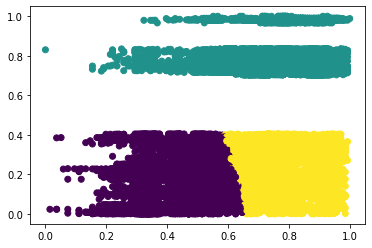

In [91]:
plt.scatter(unknown_value['yearbuilt'],unknown_value['regionidzip'], c= unknown_value['cluster'])
plt.show

In [92]:
kmeans.inertia_

907.9897027498573

In [93]:
wcss=[]

for i in range(1, 7):
    kmeans = KMeans(i)
    kmeans.fit(A)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [94]:
wcss

[4653.990714996677,
 1391.2057517858116,
 908.0003439919359,
 739.2442477758899,
 577.7959203272724,
 472.52488904684253]

Text(0, 0.5, 'Within-cluster Sum of Squares')

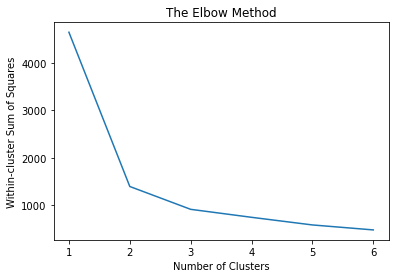

In [95]:
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares')